# Practical work 08 – 6th of November 2018 Clustering algorithms

auteurs : Costa Pedro, Delabays Louis, Guerne Jonathan

### Exercice 1 Getting the data

In [5]:
import numpy as np
import pickle

X1,label1 = pickle.load(open("dataset_1.pkl","rb"),encoding = 'latin1')
X2,label2 = pickle.load(open("dataset_2.pkl","rb"),encoding = 'latin1')

print(X1.shape)
print(X2.shape)

print(label1.shape)
print(label2.shape)


(1000, 2)
(3000, 2)
(1000,)
(3000,)


In [6]:
import matplotlib.pyplot as plt

def printDataset(X,y,k):
    x1_print_x = []
    x1_print_y = []

    for i in range(k):
        x1_print_x.append([])
        x1_print_y.append([])

    for i in range(X.shape[0]):
        (x1_print_x[y[i]]).append(X[i][0])
        (x1_print_y[y[i]]).append(X[i][1])

    for i in range(k):
        plt.scatter(x1_print_x[i],x1_print_y[i],marker='o')#,color='green')
        
    #centroid
    for i in range(k):
        plt.scatter(np.mean(x1_print_x[i]),np.mean(x1_print_y[i]),marker='X',color='black')
        
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


In [7]:
def costValue(X,y_pred,centroid,k):

    dist = 0
    
    for p in range(X.shape[0]):    
            dist += ((centroid[int(y_pred[p]),0]-X[p,0])**2 + (centroid[int(y_pred[p]),1]-X[p,1])**2)

    return dist      

### Exercice 2  The k-means algorithm

In [8]:
def printKmeans(X,y_new,k,centroid):
    x1_print_x = []
    x1_print_y = []

    for i in range(k):
        x1_print_x.append([])
        x1_print_y.append([])

    for i in range(X.shape[0]):
        (x1_print_x[int(y_new[i])]).append(X[i][0])
        (x1_print_y[int(y_new[i])]).append(X[i][1])

    for i in range(k):
        plt.scatter(x1_print_x[i],x1_print_y[i],marker='o')


    #centroid
    for i in range(k):
        plt.scatter(centroid[i,0],centroid[i,1],marker='X',color='black')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [9]:
def Kmeans(X,y,k):

    J = []
    convergenceCriteria=False
    
    #Init centroid
    centroid = np.random.rand(k,2)

    #adapt spread of the randomly generated centroid to X
    #X
    centroid[:,0] = centroid[:,0]*(np.abs(np.max(X[:,0]) - np.min(X[:,0]))) - np.abs(np.min(X[:,0]))
    #Y
    centroid[:,1] = centroid[:,1]*(np.abs(np.max(X[:,1]) - np.min(X[:,1]))) - np.abs(np.min(X[:,1]))

    while(convergenceCriteria==False):

        if len(J) > 1: # not at the first iteration
            #find new centroid
            for c in range(k):
                centroid[c,0] = np.sum(X[y_new == c,0]) / len(X[y_new == c,0])
                centroid[c,1] = np.sum(X[y_new == c,1]) / len(X[y_new == c,1])

        #Find the closest centroid for each point
        y_new = np.zeros(len(y))

        for p in range(X.shape[0]):
            bestCentroidDist = 10000000
            bestCentroidIndex= 4
            for c in range(k):
                dist = ((centroid[c,0]-X[p,0])**2 + (centroid[c,1]-X[p,1])**2)

                if dist < bestCentroidDist:
                    bestCentroidDist = dist
                    bestCentroidIndex = c

            y_new[p] = bestCentroidIndex
            
        J.append(costValue(X,y_new,centroid,k))
        
        if len(J)>2:
            if abs(J[-1] - J[-2]) < 1:#arbitrary value (works for these dataset)
                convergenceCriteria = True
    
    return y_new,centroid,J

In [10]:
def printCostValue(J):
    
    t = np.arange(0,len(J))
    
    plt.plot(t,J)
    plt.xlabel('iteration')
    plt.ylabel('J / cost value')
    plt.title("Cost Value ")
    plt.show()   

### Exercice 3 Evaluate your model

Dataset with label:


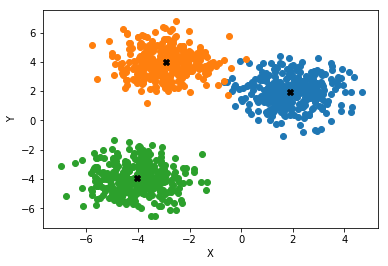

Kmean:


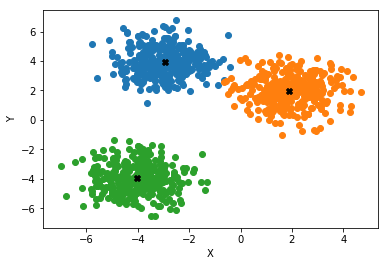

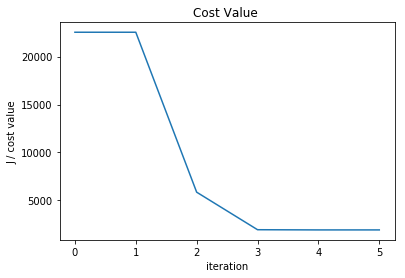

In [50]:
k=len(np.unique(label1))

print("Dataset with label:")
printDataset(X1,label1,k)

label1_hat,centroid1,J1 = Kmeans(X1,label1,k)

print("Kmean:")
printKmeans(X1,label1_hat,k,centroid1)

printCostValue(J1)

Dataset with label:


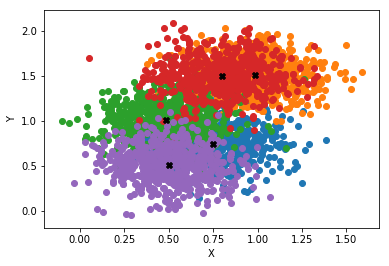

Kmean:


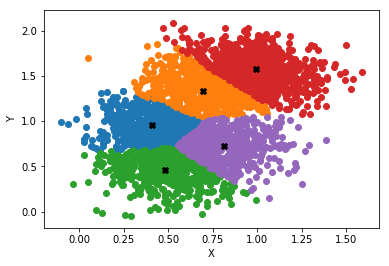

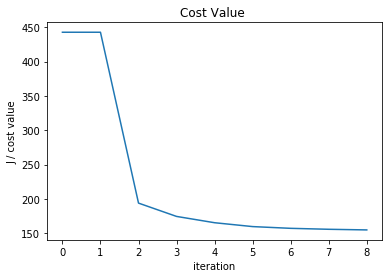

In [49]:
k=len(np.unique(label2))

print("Dataset with label:")
printDataset(X2,label2,k)

label2_hat,centroid2,J2 = Kmeans(X2,label2,k)

print("Kmean:")
printKmeans(X2,label2_hat,k,centroid2)

printCostValue(J2)

* The number of iterations needed to reach the convergence criteria varies depending on the initial position of the centroids
* The initial position of the centroids are randomly generated, this position can be anywhere within the range of the dataset's point

* In most cases, the K-means algo. does a good clustering job over the datasets. In some cases, we can observe that it's stuck in some local minimum and the clustering is incorrect.

* In our implementation, the convergence criteria is determined by the cost value difference between 2 consecutives iteration. If this difference is less than **1**, then we considere that the clustering is done and the algo. stops. (The value 1 has been manually determined to reach good results and minimize the number of iteration)
